In [17]:
import pandas as pd
import numpy as np
from libs import data_loading_maristany, functions
from libs.data_loading_generated import calculate_features_simulation
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
data_df = pd.read_csv("data/dignon.csv")
data_df

,protein,seq,tc
0,FUS_WT,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,359.1
1,FUS_6E,MASNDYTQQATQSYGAYPTQPGQGYEQQSEQPYGQQSYSGYSQSTD...,338.9
2,FUS_6E’,MASNDYTQQATQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,339.5
3,FUS_6E*,MASNDYEQQATQSYGAYPTQPGQGYEQQSSQPYGQQSYSGYSQSTD...,338.6
4,FUS_12E,MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,290.0
5,FUS_40(2),MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSG,348.8
6,FUS_YtoF,MASNDFTQQATQSFGAFPTQPGQGFSQQSSQPFGQQSFSGFSQSTD...,372.0
7,hnRNPA2_WT,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.2
8,hnRNPA2_D290V,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,311.5
9,hnRNPA2_P298L,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.4


In [19]:
from libs.functions import calculate_features_from_seqs, load_cfg
from libs.data_loading_generated import _generate_df

In [20]:
cfg = load_cfg("configs/features_config.json")

In [5]:
seqs = {}
for i, row in data_df[["protein", "seq"]].iterrows():
    seqs[row["protein"]] = row["seq"]
features = calculate_features_from_seqs(seqs, cfg)
features

Error importing GPy.
 If trying to run parrot-optimize, make sure to use `pip install idptools-parrot[optimize]`


{'FUS_WT': {'seq': 'MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS',
  'features': {'CUSTOM': {'arginine_count': 0.0},
   'BIOPYTHON': {'molecular_weight': 17168.085799999983,
    'isoelectric_pint': 4.0500284194946286,
    'aromaticity': 0.147239263803681,
    'net_charge': -2.52137981455499,
    'hydropathy_index': -1.503680981595094,
    'length': 163,
    'composition': {'A': 0.024539877300613498,
     'C': 0.0,
     'D': 0.012269938650306749,
     'E': 0.0,
     'F': 0.0,
     'G': 0.1656441717791411,
     'H': 0.0,
     'I': 0.0,
     'K': 0.0,
     'L': 0.0,
     'M': 0.006134969325153374,
     'N': 0.03067484662576687,
     'P': 0.06748466257668712,
     'Q': 0.22699386503067484,
     'R': 0.0,
     'S': 0.25766871165644173,
     'T': 0.06134969325153374,
     'V': 0.0,
     'W': 0.0,
     'Y': 0.147239263803681},
    'flexibility': [0.9892619047619049,
     1.02

In [8]:
data_df['tc']

0     359.1
1     338.9
2     339.5
3     338.6
4     290.0
5     348.8
6     372.0
7     315.2
8     311.5
9     315.4
10    246.1
11    243.1
12    242.7
13    340.4
14    265.7
Name: tc, dtype: float64

In [9]:
data_df_f = _generate_df(features, temp_inc=False)
data_df = data_df_f.reset_index(names="gene_name").join(data_df['tc'])
data_df

KeyError: 'ct'

In [10]:
def clear_df(data_df, drop_none=True):
    columns_to_drop = []
    for column_name in data_df.columns:
        if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
            columns_to_drop.append(column_name)
    data_df = data_df.drop(labels=columns_to_drop, axis=1)
    if drop_none:
        data_df = data_df.dropna(axis=1)
    return data_df


In [11]:
data_df = clear_df(data_df)
data_df

,seq,tc
0,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,359.1
1,MASNDYTQQATQSYGAYPTQPGQGYEQQSEQPYGQQSYSGYSQSTD...,338.9
2,MASNDYTQQATQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,339.5
3,MASNDYEQQATQSYGAYPTQPGQGYEQQSSQPYGQQSYSGYSQSTD...,338.6
4,MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,290.0
5,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSG,348.8
6,MASNDFTQQATQSFGAFPTQPGQGFSQQSSQPFGQQSFSGFSQSTD...,372.0
7,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.2
8,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,311.5
9,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.4


In [12]:
data_df.columns

Index(['seq', 'tc'], dtype='object')

In [13]:
y_column = 'tc'
    
x_columns = [cn for cn in data_df.columns if cn not in ['seq', 'tc']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_df[x_columns],
                                                    data_df[y_column],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [15]:
X_train

""
9
14
4
2
13
10
7
11
3
0


In [16]:
X_test

""
1
6
8


In [15]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [16]:
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [17]:
svr_rbf.n_support_

array([12])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_df[x_columns],
                                                    data_df[y_column],
                                                    test_size=0.2,
                                                    random_state=np.random.randint(0, 100),
                                                    shuffle=True)
svr_rbf.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

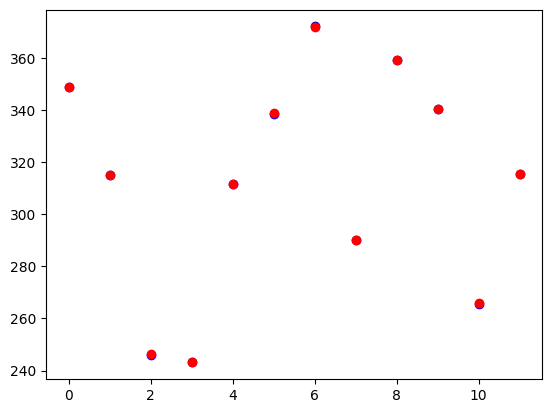

In [36]:
plt.scatter(range(len(X_train)), y_train, color='blue')
plt.scatter(range(len(svr_rbf.predict(X_train))), svr_rbf.predict(X_train), color='red')

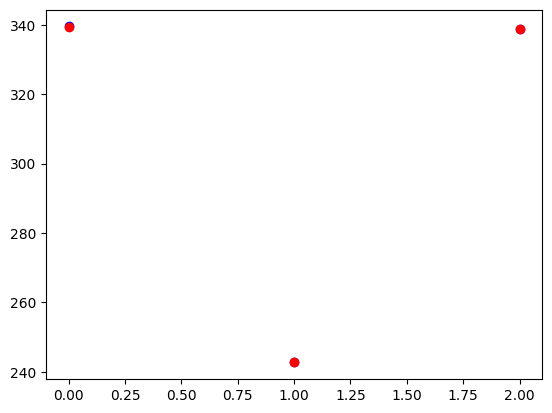

In [37]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(svr_rbf.predict(X_test))), svr_rbf.predict(X_test), color='red')

Text(0, 0.5, 'Critical temperature')

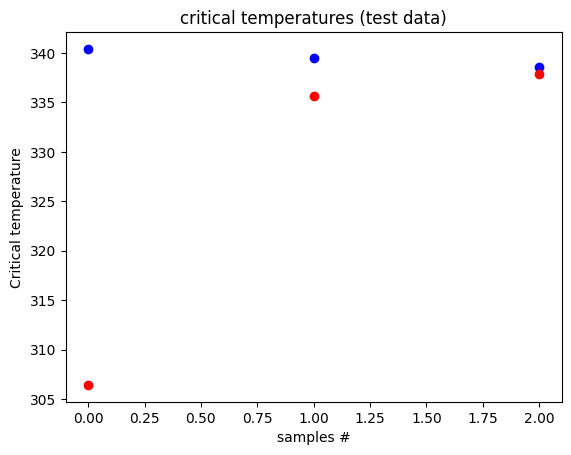

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_df[x_columns],
                                                    data_df[y_column],
                                                    test_size=0.2,
                                                    random_state=np.random.randint(0, 100),
                                                    shuffle=True)
svr_rbf.fit(X_train, y_train)

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(svr_rbf.predict(X_test))), svr_rbf.predict(X_test), color='red')
plt.title("critical temperatures (test data)")
plt.xlabel("samples #")
plt.ylabel("Critical temperature")

Text(0, 0.5, 'Critical temperature')

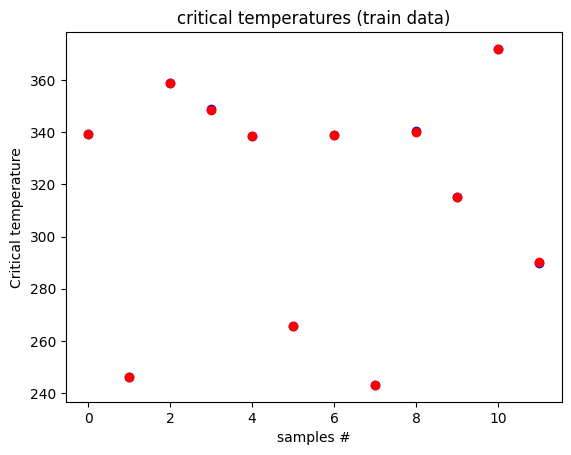

In [47]:
plt.scatter(range(len(X_train)), y_train, color='blue')
plt.scatter(range(len(svr_rbf.predict(X_train))), svr_rbf.predict(X_train), color='red')
plt.title("critical temperatures (train data)")
plt.xlabel("samples #")
plt.ylabel("Critical temperature")

In [20]:
X_train_full, y_train_full, = data_df[x_columns], data_df[y_column]
                                                   

In [28]:
X_train_full

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),fraction_of_positive_residues(S),...,complexity(S),hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP)
0,0.000000,17168.0858,4.050028,0.147239,-2.521380,-1.503681,163,84.995706,0.012270,0.000000,...,0.634958,2.996319,0.000000,0.003049,0.000000,28.691842,62.312388,0.316236,0.390625,9.097462
1,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,86.235583,0.049080,0.000000,...,0.667476,2.896319,0.000000,0.063055,0.000000,29.365542,62.764466,0.324936,0.401427,9.034252
2,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,85.266871,0.049080,0.000000,...,0.667476,2.896319,0.000000,0.069047,0.000000,29.409548,62.616635,0.325317,0.397993,9.151751
3,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,85.773006,0.049080,0.000000,...,0.667476,2.896319,0.000000,0.078111,0.000000,29.178450,62.913369,0.322196,0.400823,9.038077
4,0.000000,17616.4198,4.050028,0.147239,-14.487654,-1.704908,163,89.853374,0.085890,0.000000,...,0.674979,2.795092,0.000000,0.130270,0.000000,30.140038,64.124333,0.335788,0.412371,8.890516
5,0.000000,4341.4211,4.050028,0.150000,-1.504519,-1.425000,40,71.127500,0.025000,0.000000,...,0.686165,3.075000,0.000000,0.000000,0.000000,16.419316,37.910542,0.415278,0.511180,7.138429
6,0.000000,16784.1002,4.050028,0.147239,-2.497404,-0.900000,163,98.543558,0.012270,0.000000,...,0.634958,3.600000,0.000000,0.003049,0.000000,30.478562,67.392175,0.335952,0.432709,8.434603
7,0.052632,14364.4729,9.300934,0.164474,3.747643,-1.132895,152,23.348026,0.092105,0.059211,...,0.599228,3.367105,0.053267,0.005935,0.054520,26.507752,57.704486,0.300078,0.411416,8.054133
8,0.052632,14348.5165,9.454305,0.164474,4.746523,-1.082237,152,23.844079,0.085526,0.059211,...,0.604723,3.417763,0.053267,0.001643,0.052898,26.586690,57.989516,0.301565,0.414323,8.029727
9,0.052632,14380.5153,9.300934,0.164474,3.747643,-1.097368,152,20.813816,0.092105,0.059211,...,0.606123,3.402632,0.053267,0.005935,0.054520,26.315537,57.321315,0.299283,0.408670,8.023952


In [1]:
feature_to_draw = "net_charge(BP)"
X_train_full, y_train_full, = data_df.sort_values(by=feature_to_draw)[x_columns], data_df.sort_values(by=feature_to_draw)[y_column]

lw = 2


svrs = [svr_rbf, svr_lin, svr_poly]
svrs = [svr_rbf]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X_train_full["net_charge(BP)"],
        svr.fit(X_train_full, y_train_full).predict(X_train_full),
        color="BLACK",
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full["net_charge(BP)"],
        y_train_full.iloc[svr.support_],
        facecolor="BLUE",
        edgecolor="GREEN",
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
        y_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression (Critical temp)", fontsize=14)
plt.show()

NameError: name 'data_df' is not defined

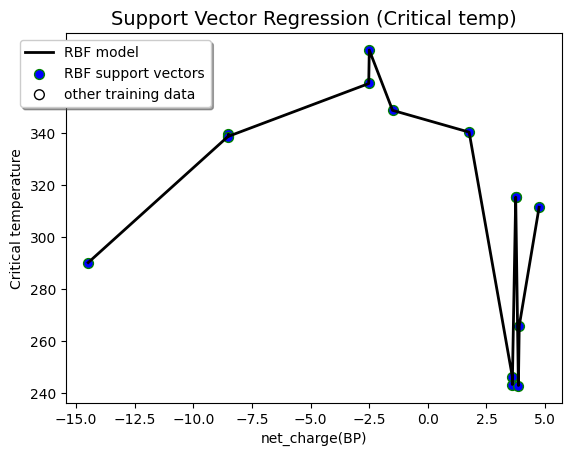

In [61]:
feature_to_draw = "net_charge(BP)"
X_train_full, y_train_full, = data_df.sort_values(by=feature_to_draw)[x_columns], data_df.sort_values(by=feature_to_draw)[y_column]

lw = 2


svrs = [svr_rbf, svr_lin, svr_poly]
svrs = [svr_rbf]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]


plt.plot(
    X_train_full["net_charge(BP)"],
    svr.fit(X_train_full, y_train_full).predict(X_train_full),
    color="BLACK",
    lw=lw,
    label="{} model".format(kernel_label[ix]),
)
plt.scatter(
    X_train_full["net_charge(BP)"],
    y_train_full.iloc[svr.support_],
    facecolor="BLUE",
    edgecolor="GREEN",
    s=50,
    label="{} support vectors".format(kernel_label[ix]),
)
plt.scatter(
    X_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    y_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    facecolor="none",
    edgecolor="k",
    s=50,
    label="other training data",
)
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.1, 1),
    ncol=1,
    fancybox=True,
    shadow=True,
)

fig.text(0.1, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
plt.title("Support Vector Regression (Critical temp)", fontsize=14)
plt.xlabel("net_charge(BP)")
plt.ylabel("Critical temperature")
plt.show()

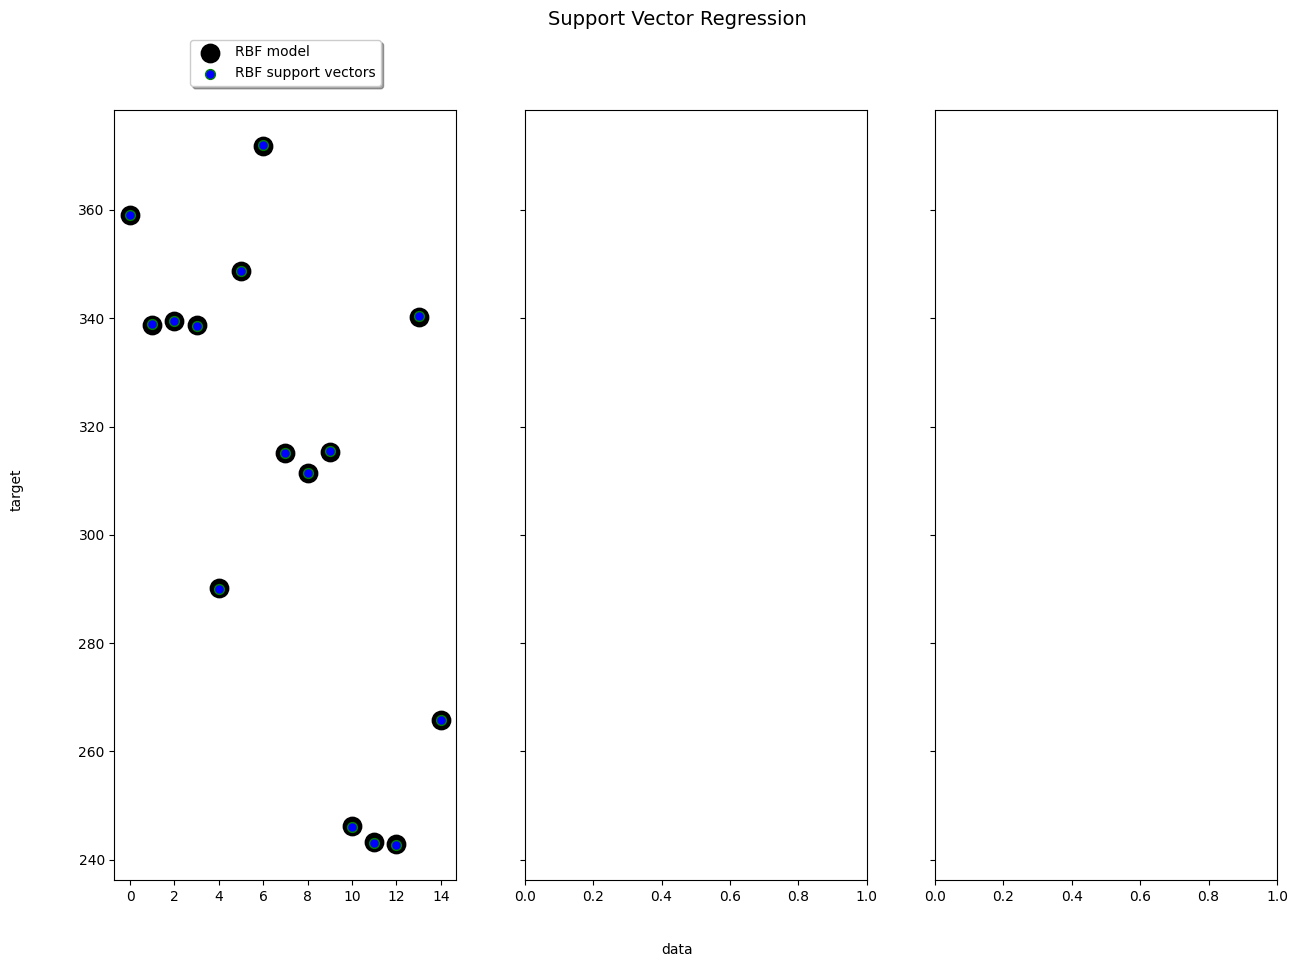

In [27]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
svrs = [svr_rbf]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(
        X_train_full.index.values,
        svr.fit(X_train_full, y_train_full).predict(X_train_full),
        color="BLACK",
        s=150,
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full.iloc[svr.support_].index.values,
        y_train_full.iloc[svr.support_],
        facecolor="BLUE",
        edgecolor="GREEN",
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    # axes[ix].scatter(
    #     X_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    #     y_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    #     facecolor="none",
    #     edgecolor="k",
    #     s=50,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
svrs = [svr_rbf]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X_train_full.index.values,
        svr.fit(X_train_full, y_train_full).predict(X_train_full),
        color="BLACK",
        s=150,
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full.iloc[svr.support_].index.values,
        y_train_full.iloc[svr.support_],
        facecolor="BLUE",
        edgecolor="GREEN",
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    # axes[ix].scatter(
    #     X_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    #     y_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
    #     facecolor="none",
    #     edgecolor="k",
    #     s=50,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
#svrs = [svr_rbf]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(
        X_train_full.index.values,
        svr.fit(X_train_full, y_train_full).predict(X_train_full),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full.iloc[svr.support_].index.values,
        y_train_full.iloc[svr.support_],
        facecolor="BLUE",
        edgecolor=model_color[ix],
         s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
        y_train_full[np.setdiff1d(np.arange(len(X_train_full)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

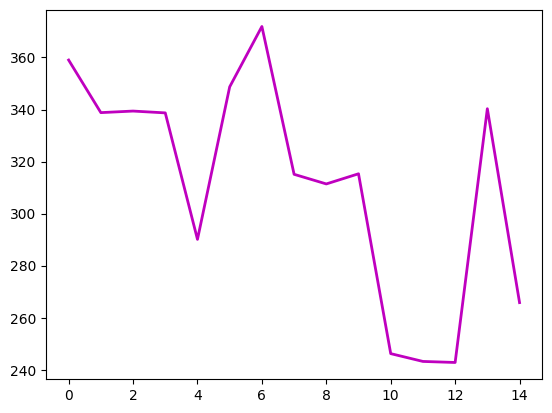

In [36]:
plt.plot(
        X_train_full.index.values,
        svr.fit(X_train_full, y_train_full).predict(X_train_full),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )

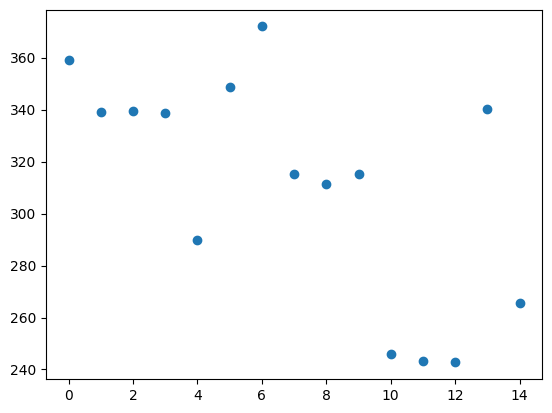

In [28]:
plt.scatter(X_train_full.iloc[svr.support_].index.values, y_train_full.iloc[svr.support_])
        

0     359.1
1     338.9
2     339.5
3     338.6
4     290.0
5     348.8
6     372.0
7     315.2
8     311.5
9     315.4
10    246.1
11    243.1
12    242.7
13    340.4
14    265.7
Name: tc, dtype: float64

In [94]:
X_train_full.iloc[svr.support_].index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [77]:
svr.support_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [78]:
X_train

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),fraction_of_positive_residues(S),...,complexity(S),hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP)
6,0.000000,16784.1002,4.050028,0.147239,-2.497404,-0.900000,163,98.543558,0.012270,0.000000,...,0.634958,3.600000,0.000000,0.003049,0.000000,30.478562,67.392175,0.335952,0.432709,8.434603
8,0.052632,14348.5165,9.454305,0.164474,4.746523,-1.082237,152,23.844079,0.085526,0.059211,...,0.604723,3.417763,0.053267,0.001643,0.052898,26.586690,57.989516,0.301565,0.414323,8.029727
2,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,85.266871,0.049080,0.000000,...,0.667476,2.896319,0.000000,0.069047,0.000000,29.409548,62.616635,0.325317,0.397993,9.151751
10,0.142857,16771.6644,9.557325,0.071429,3.603784,-1.706548,168,39.888690,0.261905,0.142857,...,0.676104,2.793452,0.087787,0.119454,0.202619,30.993090,70.265952,0.348465,0.451403,7.188062
5,0.000000,4341.4211,4.050028,0.150000,-1.504519,-1.425000,40,71.127500,0.025000,0.000000,...,0.686165,3.075000,0.000000,0.000000,0.000000,16.419316,37.910542,0.415278,0.511180,7.138429
11,0.142857,16691.5366,9.557325,0.071429,3.603784,-1.692262,168,37.825000,0.261905,0.142857,...,0.658614,2.807738,0.087787,0.119454,0.202619,30.431349,69.263262,0.352559,0.458553,7.051473
14,0.142857,16771.6644,9.558872,0.071429,3.899304,-1.706548,168,19.856548,0.261905,0.142857,...,0.676104,2.793452,0.389485,0.125436,0.347366,30.964966,67.457754,0.347307,0.465759,7.430691
1,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,86.235583,0.049080,0.000000,...,0.667476,2.896319,0.000000,0.063055,0.000000,29.365542,62.764466,0.324936,0.401427,9.034252
0,0.000000,17168.0858,4.050028,0.147239,-2.521380,-1.503681,163,84.995706,0.012270,0.000000,...,0.634958,2.996319,0.000000,0.003049,0.000000,28.691842,62.312388,0.316236,0.390625,9.097462
4,0.000000,17616.4198,4.050028,0.147239,-14.487654,-1.704908,163,89.853374,0.085890,0.000000,...,0.674979,2.795092,0.000000,0.130270,0.000000,30.140038,64.124333,0.335788,0.412371,8.890516
